In [1]:
#Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#reading the data
df = pd.read_csv('movies.csv')

In [2]:
#let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


DATA CLEANING

In [3]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
#the missing percentage
for col in df.columns:
    pct_missing = round(df[col].isnull().sum() / len(df[col])*100,2)
    print(col,':', pct_missing , '%')

name : 0.0 %
rating : 1.0 %
genre : 0.0 %
year : 0.0 %
released : 0.03 %
score : 0.04 %
votes : 0.04 %
director : 0.0 %
writer : 0.04 %
star : 0.01 %
country : 0.04 %
budget : 28.31 %
gross : 2.46 %
company : 0.22 %
runtime : 0.05 %


In [5]:
# Filling up the missing values

#for numeric
for col in ['budget', 'gross', 'runtime', 'score', 'votes']:
    df[col] = df[col].fillna(df[col].median())
#for non-numeric
for col in ['rating', 'company', 'writer', 'country', 'released', 'star']:
    df[col] = df[col].fillna('Unknown')

#the missing percentage after the filling
for col in df.columns:
    pct_missing = round(df[col].isnull().sum() / len(df[col])*100,2)
    print(col,':', pct_missing , '%')

name : 0.0 %
rating : 0.0 %
genre : 0.0 %
year : 0.0 %
released : 0.0 %
score : 0.0 %
votes : 0.0 %
director : 0.0 %
writer : 0.0 %
star : 0.0 %
country : 0.0 %
budget : 0.0 %
gross : 0.0 %
company : 0.0 %
runtime : 0.0 %


In [6]:
#data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#change data type for Budget and Gross columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [8]:
df['year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [9]:
df = df.sort_values(by= ['gross'], inplace=False, ascending= False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7668 entries, 5445 to 3203
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   int64  
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   int64  
 12  gross     7668 non-null   int64  
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(2), int64(4), object(9)
memory usage: 958.5+ KB


In [11]:
#Drop any duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,Unknown,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0
2417,Madadayo,Unknown,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [12]:
#pd.set_option('display.max_rows', None) #shows the whole dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7668 entries, 5445 to 3203
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   int64  
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   int64  
 12  gross     7668 non-null   int64  
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(2), int64(4), object(9)
memory usage: 958.5+ KB


In [14]:
#budget has high correlation with gross
#company has high correlation with gross

<function matplotlib.pyplot.show(close=None, block=None)>

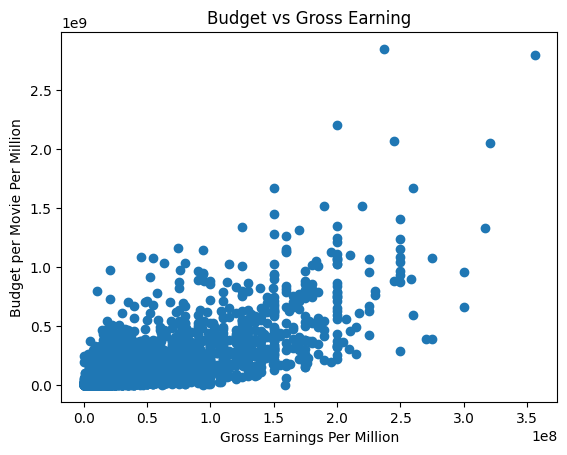

In [15]:
#scatter plot with budget vs gross

plt.scatter(x= df['budget'], y= df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earnings Per Million')
plt.ylabel('Budget per Movie Per Million')
plt.show

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


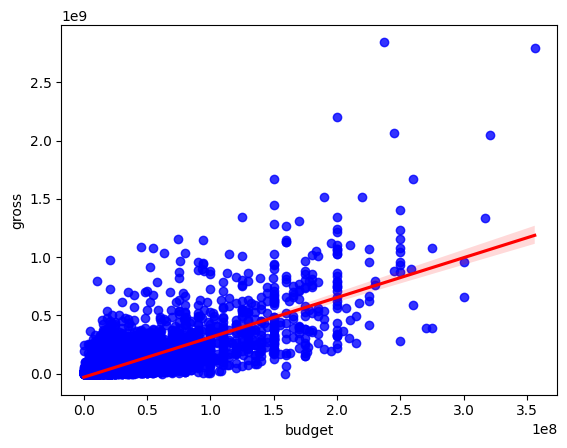

In [17]:
#plot budget vs gross using seaborn

sns.regplot(x= 'budget', y= 'gross', data= df, scatter_kws= {'color': 'blue'}, line_kws= {'color': 'red'})
plt.show()

In [18]:
#let's start looking correlation

df.corr( numeric_only=True,method='pearson') #pearson is the defult

,year,score,votes,budget,gross,runtime
year,1.000000,0.098013,0.222573,0.291690,0.259504,0.120662
score,0.098013,1.000000,0.409157,0.061931,0.185563,0.399407
votes,0.222573,0.409157,1.000000,0.460968,0.632120,0.309151
budget,0.291690,0.061931,0.460968,1.000000,0.745881,0.273371
gross,0.259504,0.185563,0.632120,0.745881,1.000000,0.244380
runtime,0.120662,0.399407,0.309151,0.273371,0.244380,1.000000


In [1]:
#high correlation between budget and gross
#i was right

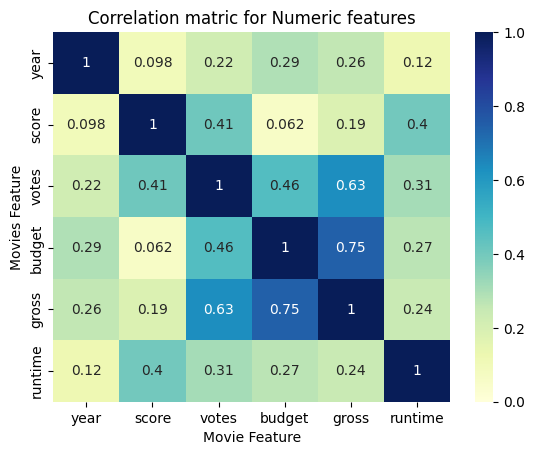

In [20]:
correlation_matrix =df.corr( numeric_only=True,method='pearson') 

sns.heatmap(correlation_matrix, annot=True , cmap= 'YlGnBu' , vmin= 0, vmax=1 )
plt.title('Correlation matric for Numeric features')
plt.xlabel('Movie Feature')
plt.ylabel('Movies Feature')
plt.show()

In [21]:
#looks at company 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [22]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0


In [23]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0


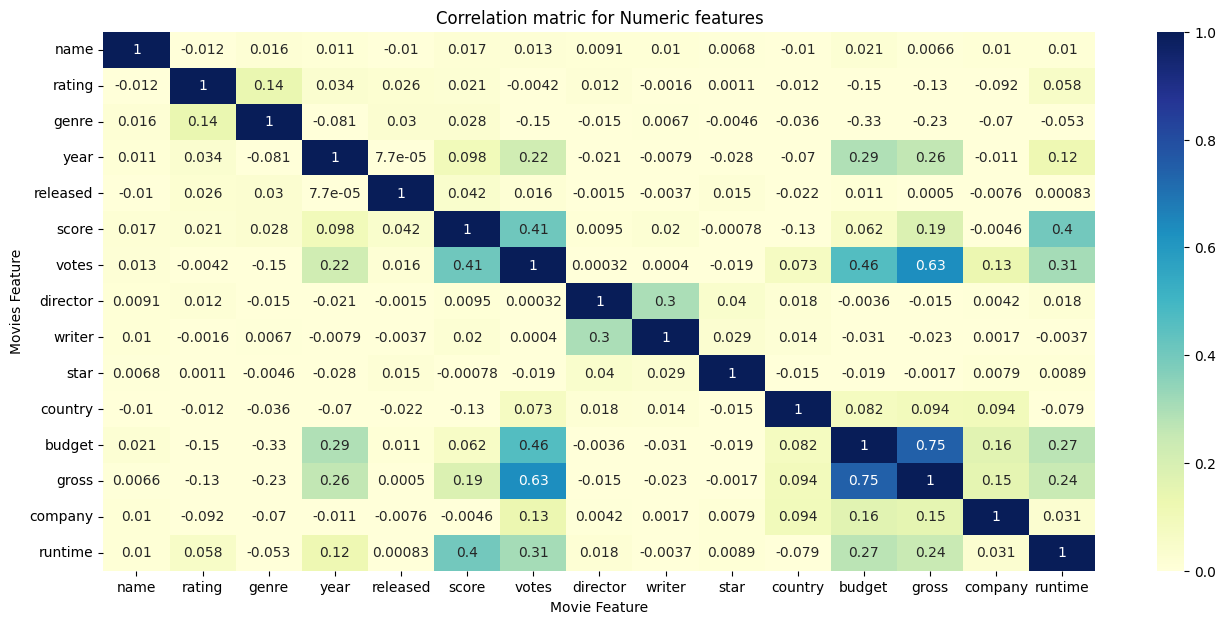

In [24]:
plt.figure(figsize=(16, 7))

correlation_matrix = df_numerized.corr( numeric_only=True,method='pearson') 

sns.heatmap(correlation_matrix, annot=True, cmap= 'YlGnBu' ,vmax=1 , vmin= 0)
plt.title('Correlation matric for Numeric features')
plt.xlabel('Movie Feature')
plt.ylabel('Movies Feature')
plt.show()

In [25]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.012206,0.016355,0.011453,-0.010480,0.017105,0.013056,0.009079,0.009985,0.006844,-0.010359,0.020921,0.006601,0.010373,0.010335
rating,-0.012206,1.000000,0.136127,0.033801,0.025526,0.021087,-0.004217,0.011951,-0.001610,0.001063,-0.011793,-0.149686,-0.130747,-0.092284,0.058023
genre,0.016355,0.136127,1.000000,-0.081261,0.030429,0.027965,-0.145291,-0.015258,0.006747,-0.004641,-0.035783,-0.328484,-0.233385,-0.070032,-0.052719
year,0.011453,0.033801,-0.081261,1.000000,0.000077,0.098013,0.222573,-0.020795,-0.007930,-0.027912,-0.069590,0.291690,0.259504,-0.011425,0.120662
released,-0.010480,0.025526,0.030429,0.000077,1.000000,0.042185,0.016016,-0.001526,-0.003707,0.015474,-0.021707,0.010848,0.000495,-0.007634,0.000832
score,0.017105,0.021087,0.027965,0.098013,0.042185,1.000000,0.409157,0.009540,0.019738,-0.000781,-0.134427,0.061931,0.185563,-0.004560,0.399407
votes,0.013056,-0.004217,-0.145291,0.222573,0.016016,0.409157,1.000000,0.000316,0.000399,-0.019429,0.073461,0.460968,0.632120,0.130583,0.309151
director,0.009079,0.011951,-0.015258,-0.020795,-0.001526,0.009540,0.000316,1.000000,0.299523,0.039875,0.018014,-0.003584,-0.014758,0.004248,0.017611
writer,0.009985,-0.001610,0.006747,-0.007930,-0.003707,0.019738,0.000399,0.299523,1.000000,0.028887,0.014490,-0.031041,-0.023034,0.001729,-0.003709
star,0.006844,0.001063,-0.004641,-0.027912,0.015474,-0.000781,-0.019429,0.039875,0.028887,1.000000,-0.015101,-0.018902,-0.001675,0.007918,0.008937


In [26]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.012206
         genre       0.016355
         year        0.011453
         released   -0.010480
                       ...   
runtime  country    -0.079230
         budget      0.273371
         gross       0.244380
         company     0.031007
         runtime     1.000000
Length: 225, dtype: float64

In [27]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs


genre    budget    -0.328484
budget   genre     -0.328484
gross    genre     -0.233385
genre    gross     -0.233385
rating   budget    -0.149686
                      ...   
budget   budget     1.000000
country  country    1.000000
gross    gross      1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [28]:
high_corr= sorted_pairs[((sorted_pairs) > 0.5) & ((sorted_pairs) < 1)]
important_high_corr = high_corr.drop_duplicates()
important_high_corr = (important_high_corr * 100).round(2).astype(str) +' %'
print(important_high_corr.sort_values(ascending=False))

budget  gross    74.59 %
votes   gross    63.21 %
dtype: object


In [29]:
#Both votes and budget have high correlation with gross

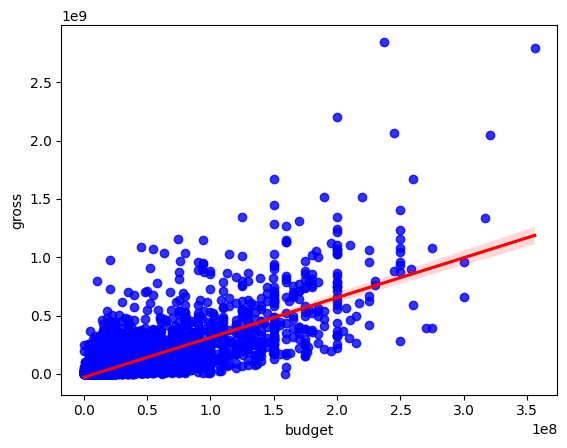

In [30]:
#plot budget vs gross using seaborn

sns.regplot(x= 'budget', y= 'gross', data= df, scatter_kws= {'color': 'blue'}, line_kws= {'color': 'red'})
plt.show()

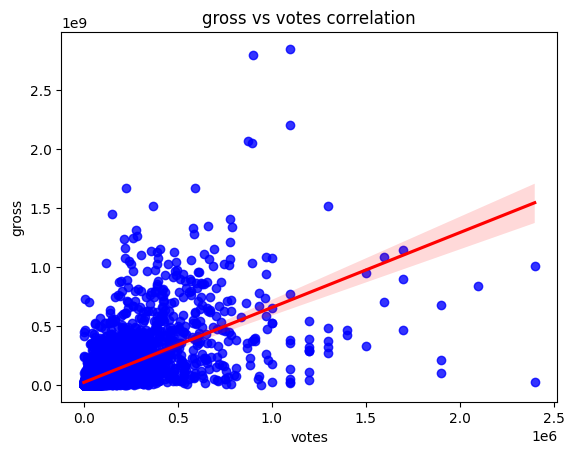

In [31]:
#plot Votes vs Groos correlation

sns.regplot(x= 'votes' , y= 'gross', data= df_numerized, scatter_kws= {'color': 'blue'}, line_kws= {'color': 'red'})
plt.title('gross vs votes correlation')
plt.show()